In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings


In [2]:
# Reading the CSV file
df = pd.read_csv("../Data_Files/datafile_4.csv")

# Displaying the first few rows of the DataFrame
df.head()


,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


In [3]:
# Melting the DataFrame to have a long format
melted_df = pd.melt(df, id_vars=['Crop'], value_vars=df.columns[1:], var_name='Year', value_name='Production')

# Displaying the first few rows of the melted DataFrame
print(melted_df.head())

# Converting 'Year' to numerical value
melted_df['Year'] = melted_df['Year'].apply(lambda x: int(x.split('-')[0]))

# Displaying the first few rows after conversion
melted_df.head()


             Crop     Year  Production
0            Rice  2004-05       100.0
1           Wheat  2004-05       100.0
2  Coarse Cereals  2004-05       100.0
3          Pulses  2004-05       100.0
4     Vegetables   2004-05       100.0


,Crop,Year,Production
0,Rice,2004,100.0
1,Wheat,2004,100.0
2,Coarse Cereals,2004,100.0
3,Pulses,2004,100.0
4,Vegetables,2004,100.0


In [4]:
crops = melted_df['Crop'].unique()
crops


array(['Rice', 'Wheat', 'Coarse Cereals', 'Pulses', 'Vegetables ',
       'Fruits', 'Milk', 'Eggs, Fish and Meat', 'Oilseeds', 'Sugarcane ',
       'Fibers', 'All Agriculture', nan], dtype=object)

In [5]:
# Remove leading and trailing whitespace from the 'Crop' column
melted_df['Crop'] = melted_df['Crop'].str.strip()

# Check the unique crop names again
crops = melted_df['Crop'].unique()
print(crops)


['Rice' 'Wheat' 'Coarse Cereals' 'Pulses' 'Vegetables' 'Fruits' 'Milk'
 'Eggs, Fish and Meat' 'Oilseeds' 'Sugarcane' 'Fibers' 'All Agriculture'
 nan]


In [6]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        96 non-null     object 
 1   Year        104 non-null    int64  
 2   Production  96 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [7]:
print(f"Proportion of missing data in 'Crop': {melted_df['Crop'].isna().mean() * 100:.2f}%")
print(f"Proportion of missing data in 'Production': {melted_df['Production'].isna().mean() * 100:.2f}%")


Proportion of missing data in 'Crop': 7.69%
Proportion of missing data in 'Production': 7.69%


In [8]:
melted_df = melted_df.dropna()

In [9]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 102
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        96 non-null     object 
 1   Year        96 non-null     int64  
 2   Production  96 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [10]:
crops = melted_df['Crop'].unique()
crops

array(['Rice', 'Wheat', 'Coarse Cereals', 'Pulses', 'Vegetables',
       'Fruits', 'Milk', 'Eggs, Fish and Meat', 'Oilseeds', 'Sugarcane',
       'Fibers', 'All Agriculture'], dtype=object)

In [11]:
melted_df.shape

(96, 3)

# Hot Enoding 
Changing the categorical data to Numerical

In [12]:
# Create dummy variables for the 'Crop' column
x = pd.get_dummies(melted_df[['Year', 'Crop']], columns=['Crop'])
x.head(3)

,Year,Crop_All Agriculture,Crop_Coarse Cereals,"Crop_Eggs, Fish and Meat",Crop_Fibers,Crop_Fruits,Crop_Milk,Crop_Oilseeds,Crop_Pulses,Crop_Rice,Crop_Sugarcane,Crop_Vegetables,Crop_Wheat
0,2004,False,False,False,False,False,False,False,False,True,False,False,False
1,2004,False,False,False,False,False,False,False,False,False,False,False,True
2,2004,False,True,False,False,False,False,False,False,False,False,False,False


In [13]:
x.shape

(96, 13)

In [14]:
# Target variable
y = melted_df['Production']

# Train Test Split

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(76, 13)
(20, 13)
(76,)
(20,)


In [17]:
X_train.head()

,Year,Crop_All Agriculture,Crop_Coarse Cereals,"Crop_Eggs, Fish and Meat",Crop_Fibers,Crop_Fruits,Crop_Milk,Crop_Oilseeds,Crop_Pulses,Crop_Rice,Crop_Sugarcane,Crop_Vegetables,Crop_Wheat
43,2007,False,False,False,False,False,False,False,False,False,False,True,False
72,2009,False,False,True,False,False,False,False,False,False,False,False,False
16,2005,False,False,False,False,False,False,False,True,False,False,False,False
73,2009,False,False,False,False,False,False,True,False,False,False,False,False
95,2011,False,False,False,False,False,False,False,False,False,False,True,False


# Linear Regression

In [18]:
# Training the linear regression model
LinReg= LinearRegression()
LinReg.fit(X_train, Y_train)
    


LinearRegression()

In [19]:
    # Making predictions on the test set
Y_pred = LinReg.predict(X_test)
    
# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
    
print(f'Linear Regression - RMSE: {rmse:.2f}, R^2: {r2:.2f}')
    

Linear Regression - RMSE: 9.60, R^2: 0.53


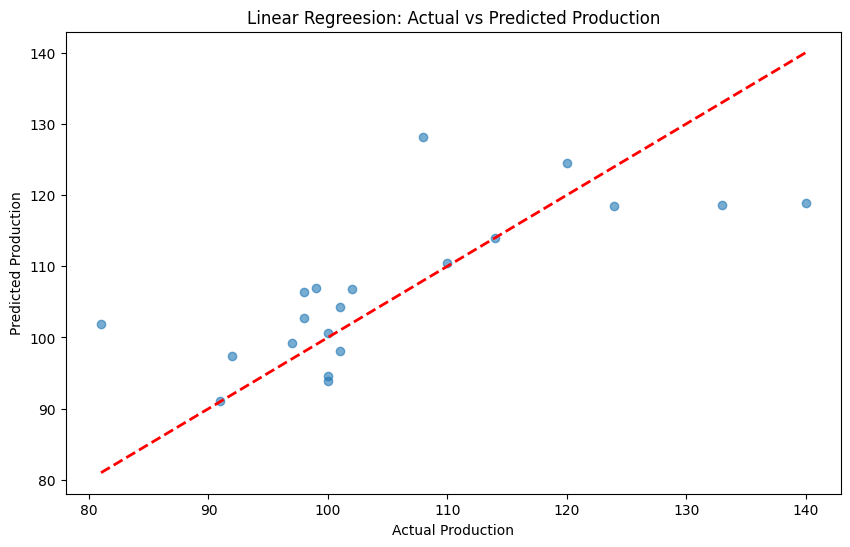

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Linear Regreesion: Actual vs Predicted Production')
plt.show()

In [21]:
#saving the pkl files 
LR_pkl_filepath = '../models_pkl_files/linerRegression.pkl'
LR_model = open(LR_pkl_filepath, 'wb')
pickle.dump(LinReg,LR_model)
LR_model.close()

# Decision Tree

In [22]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [23]:
# Predict and evaluate the model
y_pred = decision_tree_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

In [24]:
# Print performance metrics
print(f"Decision Tree - RMSE: {rmse:.2f}, R^2: {r2:.2f}")

Decision Tree - RMSE: 8.40, R^2: 0.64


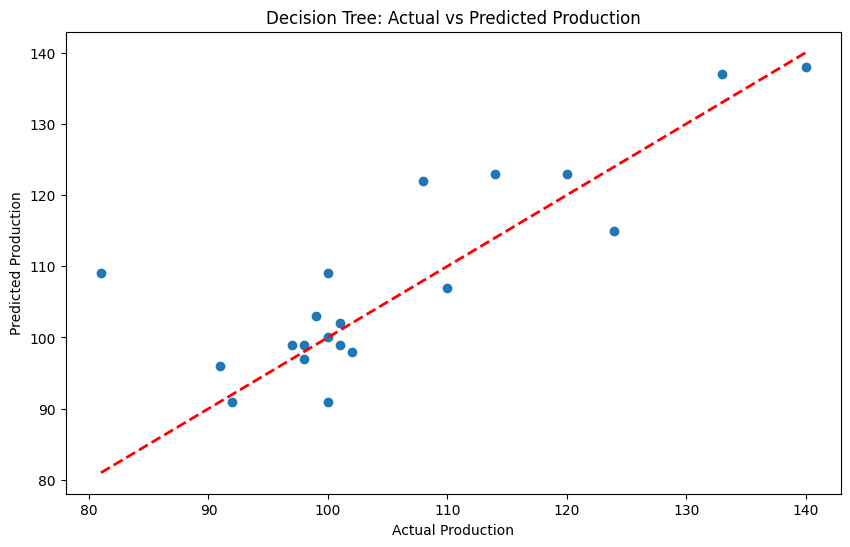

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Decision Tree: Actual vs Predicted Production')
plt.show()

In [26]:
#saving the pkl files 
DTree_pkl_filepath = '../models_pkl_files/DecisionTree.pkl'
DTree_model = open(DTree_pkl_filepath, 'wb')
pickle.dump(decision_tree_model,DTree_model)
DTree_model.close()

# Random Forest Model

In [27]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [28]:
# Predict and evaluate the model
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

In [29]:
# Print performance metrics
print(f"Random Forest - RMSE: {rmse:.2f}, R^2: {r2:.2f}")


Random Forest - RMSE: 8.60, R^2: 0.63


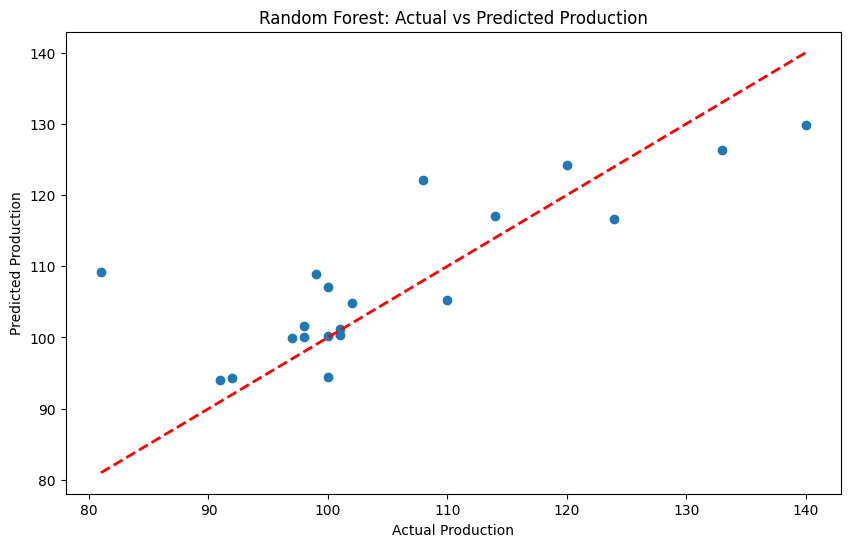

In [30]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Random Forest: Actual vs Predicted Production')
plt.show()

In [31]:
#saving the pkl files 
RF_pkl_filepath = '../models_pkl_files/RandomForest.pkl'
RF_model = open(RF_pkl_filepath, 'wb')
pickle.dump(random_forest_model,RF_model)
RF_model.close()

# Gradient Booosting Model

In [32]:
# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, Y_train)


GradientBoostingRegressor(random_state=42)

In [33]:
# Predict and evaluate the model
y_pred = gradient_boosting_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)


In [34]:
# Print performance metrics
print(f"Gradient Boosting - RMSE: {rmse:.2f}, R^2: {r2:.2f}")


Gradient Boosting - RMSE: 7.46, R^2: 0.72


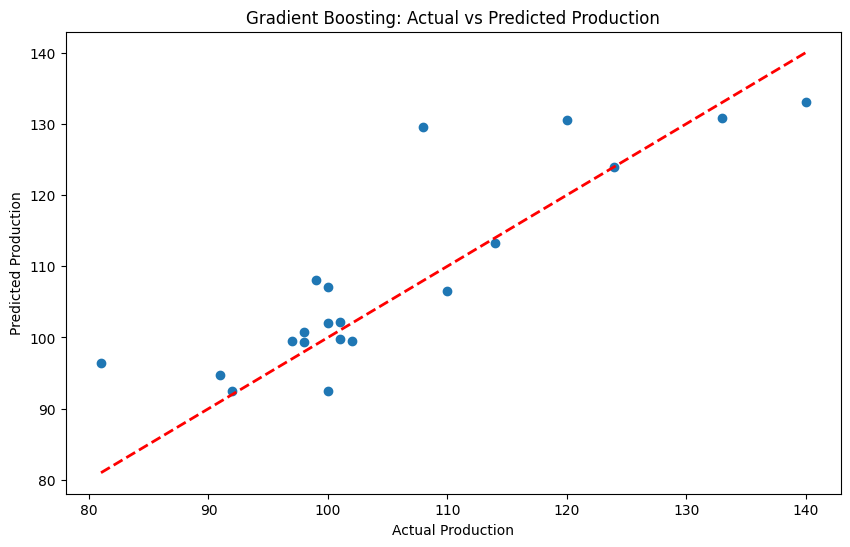

In [35]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Gradient Boosting: Actual vs Predicted Production')
plt.show()

In [36]:
#saving the pkl files 
GB_pkl_filepath = '../models_pkl_files/GradientBoosting.pkl'
GB_model = open(GB_pkl_filepath, 'wb')
pickle.dump(gradient_boosting_model,GB_model)
GB_model.close()

In [37]:
# Example prediction for a specific crop and year
def create_input(year, crop_name):
    input_df = pd.DataFrame({'Year': [year], 'Crop': [crop_name]})
    input_data = pd.get_dummies(input_df).reindex(columns=X_train.columns, fill_value=0)
    return input_data


In [38]:
# Example prediction for Rice in 2025
input_data = create_input(2029, 'Rice')
prediction = gradient_boosting_model.predict(input_data)
print(f'Predicted Production for Rice in 2025: {prediction[0]}')


Predicted Production for Rice in 2025: 114.16757473163003
